In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import requests
import json
from scipy import stats
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib inline

In [2]:
datasource = 'https://github.com/CSSEGISandData/COVID-19.git'
testsource = 'https://covidtracking.com/api/states/daily'
state_populations = 'SCPRC-EST2019-18+POP-RES.csv'
state_abbreviations = 'state_abbreviations.csv'
nation = 'US'
series = 'confirmed'

In [3]:
covid19_dir = os.path.join(
    os.environ['HOME'],
    'Covid-19',
    'COVID-19'
)
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    # 'time_series_19-covid-{series}.csv'.format(series=series),
    'time_series_covid19_{series}_global.csv'.format(series=series.lower())
)
[
    covid19_dir,
    ts_file
]

KeyError: 'HOME'

In [4]:
def run(cmd):
    result = subprocess.run(cmd, capture_output=True)
    if result.stdout:
        print('\nStdout:\n', 
              result.stdout.decode(), 
              '\n')
    if result.stderr:
        print('\nStderr:\n', 
              result.stderr.decode(), 
              '\n')
    return result

In [5]:
os.chdir(covid19_dir)
[
    run(['git', 'remote','-v', 'add', 'CSSEGISandData', datasource]),
    run(['git', 'fetch','-v', 'CSSEGISandData']),
    run(['git', 'merge', '-v', 'CSSEGISandData/master'])
]


Stderr:
 fatal: remote CSSEGISandData already exists.
 


Stderr:
 POST git-upload-pack (gzip 1034 to 598 bytes)
From https://github.com/CSSEGISandData/COVID-19
   63649e41..a4ccce6f  master     -> CSSEGISandData/master
   c642bb2c..b849db17  web-data   -> CSSEGISandData/web-data
 


Stdout:
 Updating 63649e41..a4ccce6f
Fast-forward
 .../csse_covid_19_daily_reports/03-29-2020.csv     | 3435 ++++++++++++++++++++
 .../time_series_covid19_confirmed_global.csv       |  508 +--
 .../time_series_covid19_deaths_global.csv          |  508 +--
 .../time_series_covid19_recovered_global.csv       |  480 +--
 4 files changed, 4183 insertions(+), 748 deletions(-)
 create mode 100644 csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
 



[CompletedProcess(args=['git', 'remote', '-v', 'add', 'CSSEGISandData', 'https://github.com/CSSEGISandData/COVID-19.git'], returncode=128, stdout=b'', stderr=b'fatal: remote CSSEGISandData already exists.\n'),
 CompletedProcess(args=['git', 'fetch', '-v', 'CSSEGISandData'], returncode=0, stdout=b'', stderr=b'POST git-upload-pack (gzip 1034 to 598 bytes)\nFrom https://github.com/CSSEGISandData/COVID-19\n   63649e41..a4ccce6f  master     -> CSSEGISandData/master\n   c642bb2c..b849db17  web-data   -> CSSEGISandData/web-data\n'),
 CompletedProcess(args=['git', 'merge', '-v', 'CSSEGISandData/master'], returncode=0, stdout=b'Updating 63649e41..a4ccce6f\nFast-forward\n .../csse_covid_19_daily_reports/03-29-2020.csv     | 3435 ++++++++++++++++++++\n .../time_series_covid19_confirmed_global.csv       |  508 +--\n .../time_series_covid19_deaths_global.csv          |  508 +--\n .../time_series_covid19_recovered_global.csv       |  480 +--\n 4 files changed, 4183 insertions(+), 748 deletions(-)\n 

In [6]:
ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
ts_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,8,10
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [7]:
nations = np.unique(np.array(ts_frame.loc[:,'Country/Region']))
nations

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'H

In [8]:
nationrows = ts_frame.loc[:, 'Country/Region'] == nation
nationrows

0      False
1      False
2      False
3      False
4      False
       ...  
248    False
249    False
250    False
251    False
252    False
Name: Country/Region, Length: 253, dtype: bool

In [9]:
nation_frame = ts_frame[nationrows]
nation_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886


In [10]:
nation_frame.aggregate(np.sum)

Province/State          0
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
3/25/20             65778
3/26/20             83836
3/27/20            101657
3/28/20            121478
3/29/20            140886
Length: 72, dtype: object

In [11]:
nation_series = nation_frame.agg(np.sum)[4:]
[
    type(nation_series),
    nation_series
]

[pandas.core.series.Series,
 1/22/20         1
 1/23/20         1
 1/24/20         2
 1/25/20         2
 1/26/20         5
             ...  
 3/25/20     65778
 3/26/20     83836
 3/27/20    101657
 3/28/20    121478
 3/29/20    140886
 Length: 68, dtype: object]

In [12]:
np.array(nation_series[-4:])/nation_series[-5:-1]

3/25/20    1.27453
3/26/20    1.21257
3/27/20    1.19498
3/28/20    1.15977
dtype: object

In [13]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[
    type(strdates),
    strdates,
    type(dates),
    dates,
    np.array(nation_series[:]),
    strdates[-1]
]

[pandas.core.indexes.base.Index,
 Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
        '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
        '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
        '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
        '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
        '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
        '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
        '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
        '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
        '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20'],
       dtype='object'),
 list,
 [Timestamp('2020-01-22 00:00:00'),
  Timestamp('2020-01-23 00:00:00'),
  Timestamp('2020-01-24 00:00:00'),
  Timesta

In [14]:
nations_widget = widgets.Dropdown(
    options = nations,
    value = nation,
    description = "Nation: "
)

In [15]:
# Load series into a dict of pandas dataframes
# series_options = ['Confirmed','Deaths','Recovered']
series_options = ['confirmed','deaths', 'recovered']
#series_options = [re.match(r'time_series_19-covid-(.*).csv',file)[1] for file in os.listdir(os.path.join(
#    covid19_dir,
#    'csse_covid_19_data',
#    'csse_covid_19_time_series'))
#  if re.match(r'time_series_19-covid-(.*).csv',file)
#]
series_frames = dict();
for series_to_read in series_options:
  ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    f'time_series_covid19_{series_to_read}_global.csv'    
  )
  series_frames[series_to_read] = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
    
series_frames.keys()

dict_keys(['confirmed', 'deaths', 'recovered'])

In [16]:
nation_series_cache = dict()
def get_nation_series(nation,series):
  if nation in nation_series_cache and series in nation_series_cache[nation]:
    nation_series = nation_series_cache[nation][series]
  else:
    ts_frame = series_frames[series]
    nationrows = ts_frame.loc[:, 'Country/Region'] == nation
    nation_frame = ts_frame[nationrows]
    nation_series = nation_frame.agg(np.sum)[4:]
    if nation not in nation_series_cache:
        nation_series_cache[nation] = dict()
    nation_series_cache[nation][series] = nation_series

  strdates = nation_series.keys()
  dates = [pd.to_datetime(sd) for sd in strdates]

  return (nation_series,dates)

In [17]:
series_frames.keys()

dict_keys(['confirmed', 'deaths', 'recovered'])

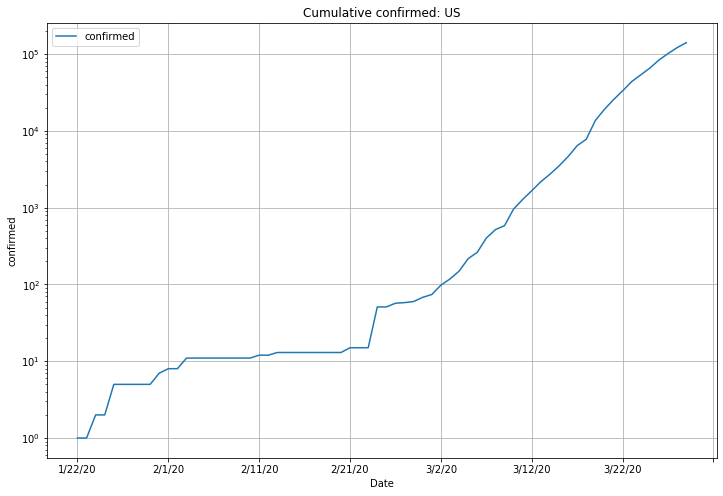

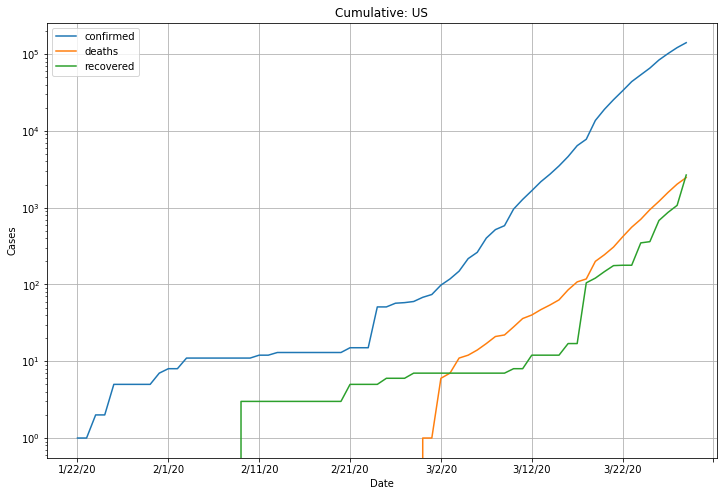

In [18]:
def plot_single_series(nation,series):
  nation_series, dates = get_nation_series(nation,series)
  nation_series.plot(
    x=dates,
    logy=True, 
    title='Cumulative {series}: {nation}'.format(series=series, nation=nation),
    grid=True,
    figsize=(12,8)
  )
  plt.grid(True)
  plt.ylabel(series)
  plt.xlabel('Date')
  plt.legend([series])

# Plot all the series
def plot_all_series(nation, series_options=series_options):
  for series in series_frames.keys():
    plot_single_series(nation,series)
  plt.ylabel('Cases')
  plt.legend(series_options)
  plt.title(f'Cumulative: {nation}')

plt.figure()
plot_single_series(nation,series)

plt.figure()
plot_all_series(nation)

In [19]:
interactive(plot_single_series,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=165, options=('Afghanistan', 'Albania', 'Algeria'…

In [20]:
def do_linear_regression(nation,series,n_points,days_back):
  nation_series, dates = get_nation_series(nation,series)
  days = np.arange(0,nation_series.shape[0])
  y = np.log10(np.float64(nation_series+1))
  if days_back >= 0:
    s = slice(-n_points,None)
  else:
    s = slice(-n_points+days_back,days_back)
  lr = stats.linregress(days[s],y[s])
  
  fig = plt.figure(figsize=(12,8))
  plt.plot(days,y)
  line = lr.slope*days[s]+lr.intercept
  plt.plot(days[s],line)
  plt.grid(True)

  plt.xlabel('Days')
  plt.ylabel('log10(Cases+1)')

  str = f"""Slope: {lr.slope:.3f}
Doubling time: {np.inf if lr.slope==0 else np.log10(2)/lr.slope:.3f} days
Daily increase: {(np.exp(lr.slope)-1)*100:2.0f}%"""

  plt.text(days[s][0]-25,line[0],str)

  return lr
    
interactive(do_linear_regression,
            nation=nations_widget,
            series=series_options,
            n_points=widgets.IntSlider(value=4,min=2,max=nation_series.shape[0]),
            days_back=widgets.IntSlider(value=0,min=-nation_series.shape[0],max=0)
           )

interactive(children=(Dropdown(description='Nation: ', index=165, options=('Afghanistan', 'Albania', 'Algeria'…

In [21]:
testresponse = requests.get(testsource)
testresponse

<Response [200]>

In [22]:
testresponse.json()

[{'date': 20200329,
  'state': 'AK',
  'positive': 102,
  'negative': 3232,
  'pending': None,
  'hospitalized': 6,
  'death': 2,
  'total': 3334,
  'hash': 'd4c0789e67f59e98176a9ea96200ed348161c6d4',
  'dateChecked': '2020-03-29T20:00:00Z',
  'totalTestResults': 3334,
  'fips': '02',
  'deathIncrease': 0,
  'hospitalizedIncrease': 1,
  'negativeIncrease': 396,
  'positiveIncrease': 17,
  'totalTestResultsIncrease': 413},
 {'date': 20200329,
  'state': 'AL',
  'positive': 806,
  'negative': 4184,
  'pending': None,
  'hospitalized': None,
  'death': 4,
  'total': 4990,
  'hash': '9dbf0b598d35897b1f6857899d0a834990f4ec51',
  'dateChecked': '2020-03-29T20:00:00Z',
  'totalTestResults': 4990,
  'fips': '01',
  'deathIncrease': 1,
  'hospitalizedIncrease': 0,
  'negativeIncrease': 0,
  'positiveIncrease': 110,
  'totalTestResultsIncrease': 110},
 {'date': 20200329,
  'state': 'AR',
  'positive': 426,
  'negative': 3027,
  'pending': None,
  'hospitalized': 48,
  'death': 6,
  'total': 3453

In [23]:
tests = pd.DataFrame(testresponse.json())
tests

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200329,AK,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29T20:00:00Z,3334,02,0.0,1.0,396.0,17.0,413.0
1,20200329,AL,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29T20:00:00Z,4990,01,1.0,0.0,0.0,110.0,110.0
2,20200329,AR,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29T20:00:00Z,3453,05,1.0,0.0,89.0,22.0,111.0
3,20200329,AS,NaN,NaN,NaN,NaN,0.0,0,f2050b47409f64a09bb4e959284c05d25eca8832,2020-03-29T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,20200329,AZ,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29T20:00:00Z,13872,04,2.0,78.0,5498.0,46.0,5544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,20200304,OR,3.0,29.0,18.0,NaN,NaN,50,5b37d7f2e6aa9fb39e09270626674b16ce9b5182,2020-03-04T21:00:00Z,32,41,NaN,NaN,NaN,NaN,NaN
1313,20200304,SC,0.0,5.0,0.0,NaN,NaN,5,992c7ca6f8259ac7a323c0b92c27123c671f3773,2020-03-04T21:00:00Z,5,45,NaN,NaN,NaN,NaN,NaN
1314,20200304,TX,1.0,NaN,NaN,NaN,NaN,1,7be175c20e3c9485c14f9764bd90385842df19c3,2020-03-04T21:00:00Z,1,48,NaN,NaN,NaN,NaN,NaN
1315,20200304,WA,39.0,NaN,NaN,NaN,NaN,39,36ea36bcf282dcc480c83b6f2561810b009bc951,2020-03-04T21:00:00Z,39,53,NaN,NaN,NaN,NaN,NaN


In [24]:
tests['dateChecked'] = pd.to_datetime(tests['dateChecked'])
tests

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200329,AK,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29 20:00:00+00:00,3334,02,0.0,1.0,396.0,17.0,413.0
1,20200329,AL,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29 20:00:00+00:00,4990,01,1.0,0.0,0.0,110.0,110.0
2,20200329,AR,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29 20:00:00+00:00,3453,05,1.0,0.0,89.0,22.0,111.0
3,20200329,AS,NaN,NaN,NaN,NaN,0.0,0,f2050b47409f64a09bb4e959284c05d25eca8832,2020-03-29 20:00:00+00:00,0,60,0.0,0.0,0.0,0.0,0.0
4,20200329,AZ,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29 20:00:00+00:00,13872,04,2.0,78.0,5498.0,46.0,5544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,20200304,OR,3.0,29.0,18.0,NaN,NaN,50,5b37d7f2e6aa9fb39e09270626674b16ce9b5182,2020-03-04 21:00:00+00:00,32,41,NaN,NaN,NaN,NaN,NaN
1313,20200304,SC,0.0,5.0,0.0,NaN,NaN,5,992c7ca6f8259ac7a323c0b92c27123c671f3773,2020-03-04 21:00:00+00:00,5,45,NaN,NaN,NaN,NaN,NaN
1314,20200304,TX,1.0,NaN,NaN,NaN,NaN,1,7be175c20e3c9485c14f9764bd90385842df19c3,2020-03-04 21:00:00+00:00,1,48,NaN,NaN,NaN,NaN,NaN
1315,20200304,WA,39.0,NaN,NaN,NaN,NaN,39,36ea36bcf282dcc480c83b6f2561810b009bc951,2020-03-04 21:00:00+00:00,39,53,NaN,NaN,NaN,NaN,NaN


In [25]:
latest = tests.loc[tests.groupby('state').dateChecked.idxmax()]
latest

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200329,AK,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29 20:00:00+00:00,3334,02,0.0,1.0,396.0,17.0,413.0
1,20200329,AL,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29 20:00:00+00:00,4990,01,1.0,0.0,0.0,110.0,110.0
2,20200329,AR,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29 20:00:00+00:00,3453,05,1.0,0.0,89.0,22.0,111.0
3,20200329,AS,NaN,NaN,NaN,NaN,0.0,0,f2050b47409f64a09bb4e959284c05d25eca8832,2020-03-29 20:00:00+00:00,0,60,0.0,0.0,0.0,0.0,0.0
4,20200329,AZ,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29 20:00:00+00:00,13872,04,2.0,78.0,5498.0,46.0,5544.0
5,20200329,CA,5708.0,20549.0,64400.0,1034.0,123.0,90657,c364ec885909accfd4baf8e2d329903900870ba9,2020-03-29 20:00:00+00:00,26257,06,22.0,0.0,0.0,1065.0,1065.0
6,20200329,CO,2061.0,11215.0,NaN,274.0,44.0,13276,10769183d6c8ae4f67d7694c1e90e053315457ad,2020-03-29 20:00:00+00:00,13276,08,13.0,35.0,1273.0,327.0,1600.0
7,20200329,CT,1993.0,9907.0,NaN,404.0,34.0,11900,a2fc8b02ed8f3a41030ae22ddb222af3d3c53a8e,2020-03-29 20:00:00+00:00,11900,09,7.0,231.0,2798.0,702.0,3500.0
8,20200329,DC,342.0,2469.0,1.0,NaN,5.0,2812,951af61bdce7b51bbfb818f7d11e3865a59e31ae,2020-03-29 20:00:00+00:00,2811,11,1.0,0.0,258.0,38.0,296.0
9,20200329,DE,232.0,36.0,NaN,33.0,6.0,268,ba8edd92448c4db2b977c3e519df1d6421968cd1,2020-03-29 20:00:00+00:00,268,10,3.0,2.0,0.0,18.0,18.0


In [26]:
posrate = latest['positive']/latest['total']
latest['posrate'] = posrate
latest = latest[latest['posrate'].notna()]
latest

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,posrate
0,20200329,AK,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29 20:00:00+00:00,3334,02,0.0,1.0,396.0,17.0,413.0,0.030594
1,20200329,AL,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29 20:00:00+00:00,4990,01,1.0,0.0,0.0,110.0,110.0,0.161523
2,20200329,AR,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29 20:00:00+00:00,3453,05,1.0,0.0,89.0,22.0,111.0,0.123371
4,20200329,AZ,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29 20:00:00+00:00,13872,04,2.0,78.0,5498.0,46.0,5544.0,0.066249
5,20200329,CA,5708.0,20549.0,64400.0,1034.0,123.0,90657,c364ec885909accfd4baf8e2d329903900870ba9,2020-03-29 20:00:00+00:00,26257,06,22.0,0.0,0.0,1065.0,1065.0,0.062963
6,20200329,CO,2061.0,11215.0,NaN,274.0,44.0,13276,10769183d6c8ae4f67d7694c1e90e053315457ad,2020-03-29 20:00:00+00:00,13276,08,13.0,35.0,1273.0,327.0,1600.0,0.155243
7,20200329,CT,1993.0,9907.0,NaN,404.0,34.0,11900,a2fc8b02ed8f3a41030ae22ddb222af3d3c53a8e,2020-03-29 20:00:00+00:00,11900,09,7.0,231.0,2798.0,702.0,3500.0,0.167479
8,20200329,DC,342.0,2469.0,1.0,NaN,5.0,2812,951af61bdce7b51bbfb818f7d11e3865a59e31ae,2020-03-29 20:00:00+00:00,2811,11,1.0,0.0,258.0,38.0,296.0,0.121622
9,20200329,DE,232.0,36.0,NaN,33.0,6.0,268,ba8edd92448c4db2b977c3e519df1d6421968cd1,2020-03-29 20:00:00+00:00,268,10,3.0,2.0,0.0,18.0,18.0,0.865672
10,20200329,FL,4246.0,39070.0,NaN,594.0,56.0,43316,8ce3ce4c8ee42dd4925356994534079c50bc67ca,2020-03-29 20:00:00+00:00,43316,12,2.0,68.0,3704.0,483.0,4187.0,0.098024


AK 3334 0.03059388122375525
AL 4990 0.16152304609218437
AR 3453 0.12337098175499565
AZ 13872 0.06624855824682814
CA 90657 0.0629625952767023
CO 13276 0.15524254293461887
CT 11900 0.16747899159663865
DC 2812 0.12162162162162163
DE 268 0.8656716417910447
FL 43316 0.09802382491458121
GA 12564 0.21099968163005411
GU 390 0.14358974358974358
HI 7004 0.021559109080525413
IA 5349 0.0628154795288839
ID 4282 0.0609528257823447
IL 27762 0.16555003241841365
IN 9830 0.1540183112919634
KS 4513 0.07068468867715488
KY 5541 0.07110629850207544
LA 27871 0.12701374188224318
MA 39066 0.1268366354374648
MD 13593 0.09114985654380932
ME 3647 0.06937208664655882
MI 17379 0.3156683353472582
MN 17657 0.028487285495837344
MO 12385 0.06766249495357288
MP 2 1.0
MS 3318 0.22845087402049427
MT 4297 0.03583895741214801
NC 18945 0.05489575085774611
ND 3453 0.028381117868520128
NE 2080 0.051923076923076926
NH 5023 0.04260402150109496
NJ 35602 0.3759901129150048
NM 11006 0.02153370888606215
NV 9150 0.08065573770491803
N

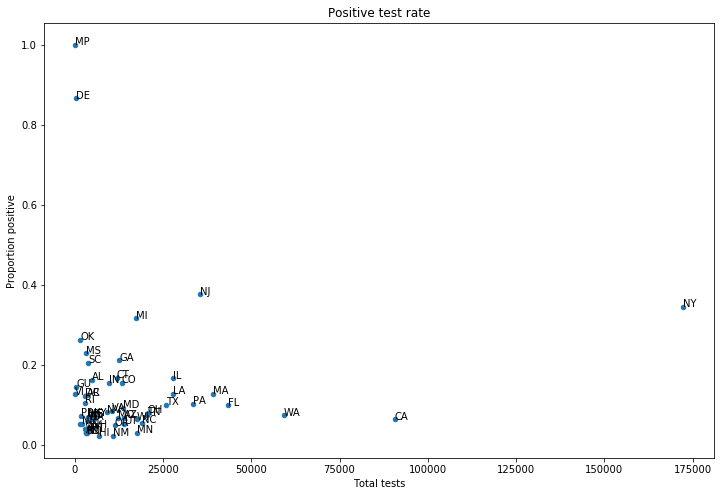

In [27]:
lplot = latest.plot(
    x='total',
    y='posrate',
    kind='scatter',
    title='Positive test rate',
    figsize=(12,8)
)
plt.xlabel('Total tests')
plt.ylabel('Proportion positive')
for i in range(len(latest)):
    try:
        row = latest.loc[i]
        lplot.annotate(row['state'], (row['total'], row['posrate']))
        print(row['state'], row['total'], row['posrate'])
    except KeyError:
        pass

In [28]:
state_pop_file = os.path.abspath(os.path.join(
    covid19_dir,
    os.pardir,
    state_populations
))
state_abb_file = os.path.abspath(os.path.join(
    covid19_dir,
    os.pardir,
    state_abbreviations
))
[
    state_pop_file,
    state_abb_file
]

['/home/leon/Covid-19/SCPRC-EST2019-18+POP-RES.csv',
 '/home/leon/Covid-19/state_abbreviations.csv']

In [29]:
state_pops = pd.read_csv(state_pop_file)
state_abbs = pd.read_csv(state_abb_file)
state_pops.set_index('NAME', inplace=True)
state_abbs.set_index('State', inplace=True)
state_pops_with_abbs = state_pops.join(state_abbs, how='inner')
state_pops_with_abbs.set_index('Abbreviation', inplace=True)
state_pops_with_abbs

,SUMLEV,REGION,DIVISION,STATE,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
Abbreviation,,,,,,,
AL,40,3,6,1,4903185,3814879,77.8
AK,40,4,9,2,731545,551562,75.4
AZ,40,4,8,4,7278717,5638481,77.5
AR,40,3,7,5,3017804,2317649,76.8
CA,40,4,9,6,39512223,30617582,77.5
CO,40,4,8,8,5758736,4499217,78.1
CT,40,1,1,9,3565287,2837847,79.6
DE,40,3,5,10,973764,770192,79.1
DC,40,3,5,11,705749,577581,81.8


In [30]:
latest_by_state = latest.set_index('state')
latest_by_state

,date,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,posrate
state,,,,,,,,,,,,,,,,,
AK,20200329,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29 20:00:00+00:00,3334,02,0.0,1.0,396.0,17.0,413.0,0.030594
AL,20200329,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29 20:00:00+00:00,4990,01,1.0,0.0,0.0,110.0,110.0,0.161523
AR,20200329,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29 20:00:00+00:00,3453,05,1.0,0.0,89.0,22.0,111.0,0.123371
AZ,20200329,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29 20:00:00+00:00,13872,04,2.0,78.0,5498.0,46.0,5544.0,0.066249
CA,20200329,5708.0,20549.0,64400.0,1034.0,123.0,90657,c364ec885909accfd4baf8e2d329903900870ba9,2020-03-29 20:00:00+00:00,26257,06,22.0,0.0,0.0,1065.0,1065.0,0.062963
CO,20200329,2061.0,11215.0,NaN,274.0,44.0,13276,10769183d6c8ae4f67d7694c1e90e053315457ad,2020-03-29 20:00:00+00:00,13276,08,13.0,35.0,1273.0,327.0,1600.0,0.155243
CT,20200329,1993.0,9907.0,NaN,404.0,34.0,11900,a2fc8b02ed8f3a41030ae22ddb222af3d3c53a8e,2020-03-29 20:00:00+00:00,11900,09,7.0,231.0,2798.0,702.0,3500.0,0.167479
DC,20200329,342.0,2469.0,1.0,NaN,5.0,2812,951af61bdce7b51bbfb818f7d11e3865a59e31ae,2020-03-29 20:00:00+00:00,2811,11,1.0,0.0,258.0,38.0,296.0,0.121622
DE,20200329,232.0,36.0,NaN,33.0,6.0,268,ba8edd92448c4db2b977c3e519df1d6421968cd1,2020-03-29 20:00:00+00:00,268,10,3.0,2.0,0.0,18.0,18.0,0.865672


In [31]:
percapita = latest_by_state.join(state_pops_with_abbs, how='inner')
percapita['Per Million'] = 1e6 * percapita['total'] / percapita['POPESTIMATE2019']
percapita

,date,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,...,totalTestResultsIncrease,posrate,SUMLEV,REGION,DIVISION,STATE,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,Per Million
AK,20200329,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29 20:00:00+00:00,3334,...,413.0,0.030594,40,4,9,2,731545,551562,75.4,4557.477667
AL,20200329,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29 20:00:00+00:00,4990,...,110.0,0.161523,40,3,6,1,4903185,3814879,77.8,1017.705838
AR,20200329,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29 20:00:00+00:00,3453,...,111.0,0.123371,40,3,7,5,3017804,2317649,76.8,1144.209498
AZ,20200329,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29 20:00:00+00:00,13872,...,5544.0,0.066249,40,4,8,4,7278717,5638481,77.5,1905.830382
CA,20200329,5708.0,20549.0,64400.0,1034.0,123.0,90657,c364ec885909accfd4baf8e2d329903900870ba9,2020-03-29 20:00:00+00:00,26257,...,1065.0,0.062963,40,4,9,6,39512223,30617582,77.5,2294.403937
CO,20200329,2061.0,11215.0,NaN,274.0,44.0,13276,10769183d6c8ae4f67d7694c1e90e053315457ad,2020-03-29 20:00:00+00:00,13276,...,1600.0,0.155243,40,4,8,8,5758736,4499217,78.1,2305.367011
CT,20200329,1993.0,9907.0,NaN,404.0,34.0,11900,a2fc8b02ed8f3a41030ae22ddb222af3d3c53a8e,2020-03-29 20:00:00+00:00,11900,...,3500.0,0.167479,40,1,1,9,3565287,2837847,79.6,3337.739711
DC,20200329,342.0,2469.0,1.0,NaN,5.0,2812,951af61bdce7b51bbfb818f7d11e3865a59e31ae,2020-03-29 20:00:00+00:00,2811,...,296.0,0.121622,40,3,5,11,705749,577581,81.8,3984.419390
DE,20200329,232.0,36.0,NaN,33.0,6.0,268,ba8edd92448c4db2b977c3e519df1d6421968cd1,2020-03-29 20:00:00+00:00,268,...,18.0,0.865672,40,3,5,10,973764,770192,79.1,275.220690
FL,20200329,4246.0,39070.0,NaN,594.0,56.0,43316,8ce3ce4c8ee42dd4925356994534079c50bc67ca,2020-03-29 20:00:00+00:00,43316,...,4187.0,0.098024,40,3,5,12,21477737,17247808,80.3,2016.786033


In [32]:
row = percapita.loc['NY']
[
    type(row),
    row,
    row.name,
    row['Per Million'],
    row['posrate']
]

[pandas.core.series.Series,
 date                                                        20200329
 positive                                                       59513
 negative                                                      112847
 pending                                                          NaN
 hospitalized                                                   12075
 death                                                            965
 total                                                         172360
 hash                        ba807849425122f97cff754bfca452232a1e75ce
 dateChecked                                2020-03-29 20:00:00+00:00
 totalTestResults                                              172360
 fips                                                              36
 deathIncrease                                                    237
 hospitalizedIncrease                                            2021
 negativeIncrease                                             

AK 4557.477667129158 0.03059388122375525
AL 1017.705838143982 0.16152304609218437
AR 1144.209498032344 0.12337098175499565
AZ 1905.8303819203302 0.06624855824682814
CA 2294.403936726111 0.0629625952767023
CO 2305.367011094101 0.15524254293461887
CT 3337.739710716136 0.16747899159663865
DC 3984.419389896408 0.12162162162162163
DE 275.22069002345535 0.8656716417910447
FL 2016.786032904677 0.09802382491458121
GA 1183.3379907723372 0.21099968163005411
HI 4946.774849703928 0.021559109080525413
IA 1695.3665053390257 0.0628154795288839
ID 2396.1075842232935 0.0609528257823447
IL 2190.845341012945 0.16555003241841365
IN 1460.142636476918 0.1540183112919634
KS 1549.0949482273452 0.07068468867715488
KY 1240.242963171208 0.07110629850207544
LA 5995.318355685367 0.12701374188224318
MA 5667.897424201339 0.1268366354374648
MD 2248.3823159677654 0.09114985654380932
ME 2713.1137052786316 0.06937208664655882
MI 1740.1871279422544 0.3156683353472582
MN 3130.8780431063587 0.028487285495837344
MO 2017.946

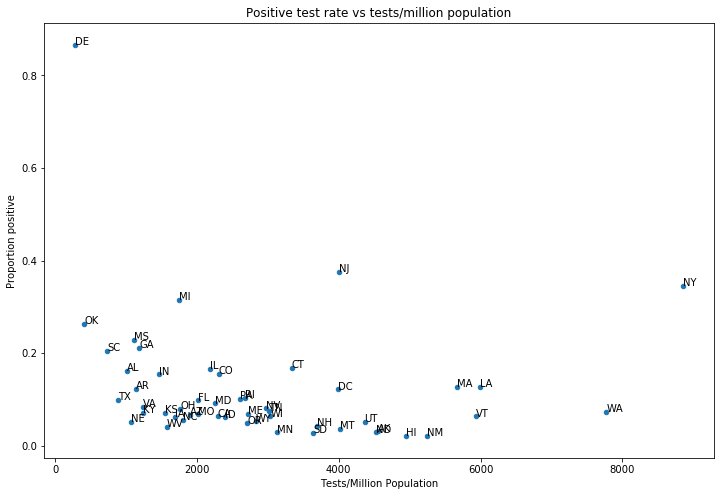

In [33]:
frame = percapita
fields = ['Per Million', 'posrate']
plot = frame.plot(
    x=fields[0],
    y=fields[1],
    kind='scatter',
    title='Positive test rate vs tests/million population',
    figsize=(12,8)
)
plt.xlabel('Tests/Million Population')
plt.ylabel('Proportion positive')
for i in frame.index:
    try:
        row = frame.loc[i]
        plot.annotate(row.name, (row[fields[0]], row[fields[1]]))
        print(row.name, row[fields[0]], row[fields[1]])
    except KeyError:
        pass